<a href="https://colab.research.google.com/github/praneethweerawardana/ML-Prajects/blob/main/Heart_disease_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from scipy import stats

from sklearn.linear_model import LinearRegression

In [72]:
df = pd.read_csv("heart_disease_prediction.csv")


In [73]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [74]:
df.isnull()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,False,False,False,False,False,False,False,False,False,False,False,False
1186,False,False,False,False,False,False,False,False,False,False,False,False
1187,False,False,False,False,False,False,False,False,False,False,False,False
1188,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [76]:
df.shape

(1190, 12)

In [77]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [78]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [79]:
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

In [80]:
df['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [81]:
df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

In [82]:
df['rest_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [83]:
df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'


In [84]:
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [85]:
df.drop(df[df.st_slope ==0].index, inplace=True)
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [86]:
df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')

In [87]:
df["sex"]

0         male
1       female
2         male
3       female
4         male
         ...  
1185      male
1186      male
1187      male
1188    female
1189      male
Name: sex, Length: 1189, dtype: object

In [88]:
df["sex"].value_counts()

male      908
female    281
Name: sex, dtype: int64

In [89]:
df.head(10)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
5,39,male,non-anginal pain,120,339,0,normal,170,0,0.0,upsloping,0
6,45,female,atypical angina,130,237,0,normal,170,0,0.0,upsloping,0
7,54,male,atypical angina,110,208,0,normal,142,0,0.0,upsloping,0
8,37,male,asymptomatic,140,207,0,normal,130,1,1.5,flat,1
9,48,female,atypical angina,120,284,0,normal,120,0,0.0,upsloping,0


In [90]:
df.to_csv('dataset_for_Exploratory.csv', encoding='utf-8')

In [91]:
df.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [92]:
df.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


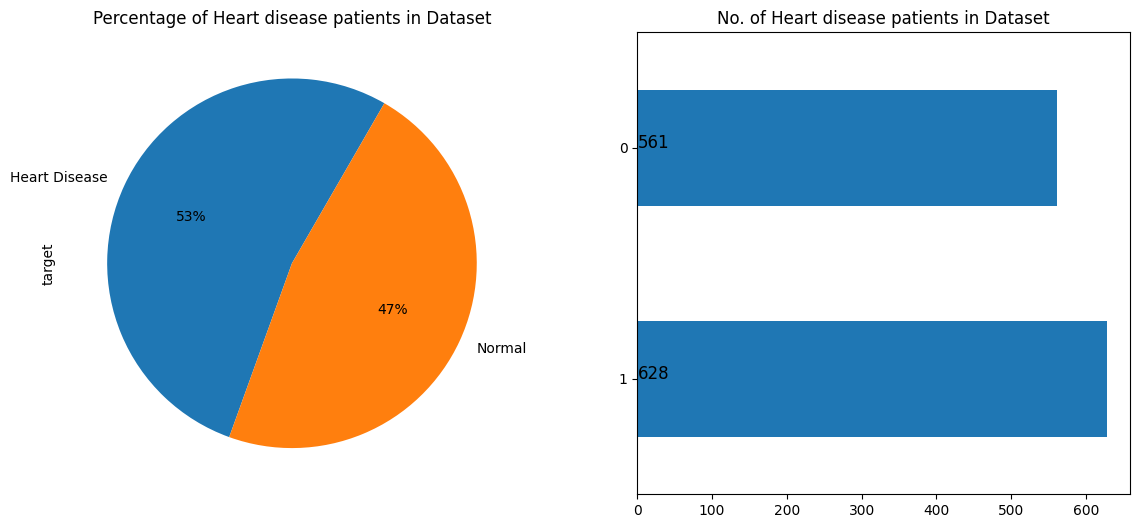

In [93]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients',
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

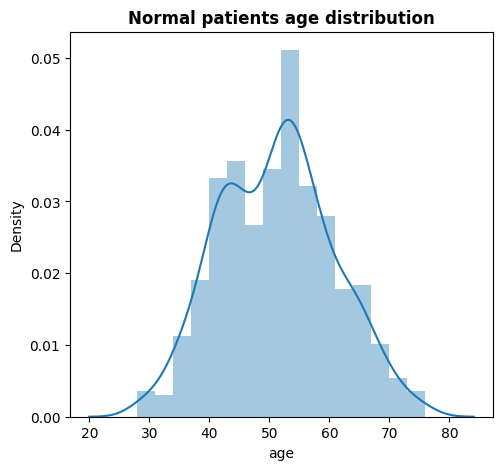

In [94]:
attr_1=df[df['target']==1]

attr_0=df[df['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('Normal patients age distribution', fontsize=12, weight='bold')

plt.show()

Text(0.5, 1.0, 'Heart disease patieent age distribution')

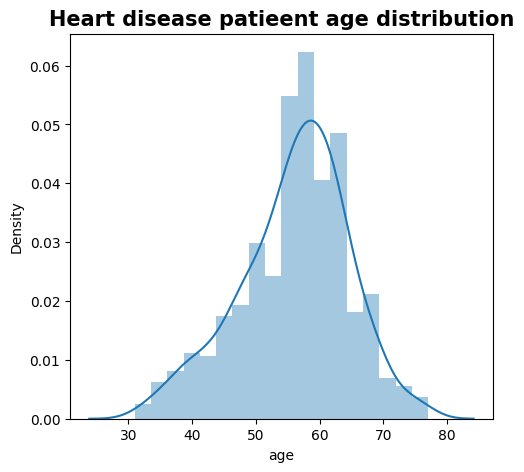

In [95]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('Heart disease patieent age distribution', fontsize=15, weight='bold')

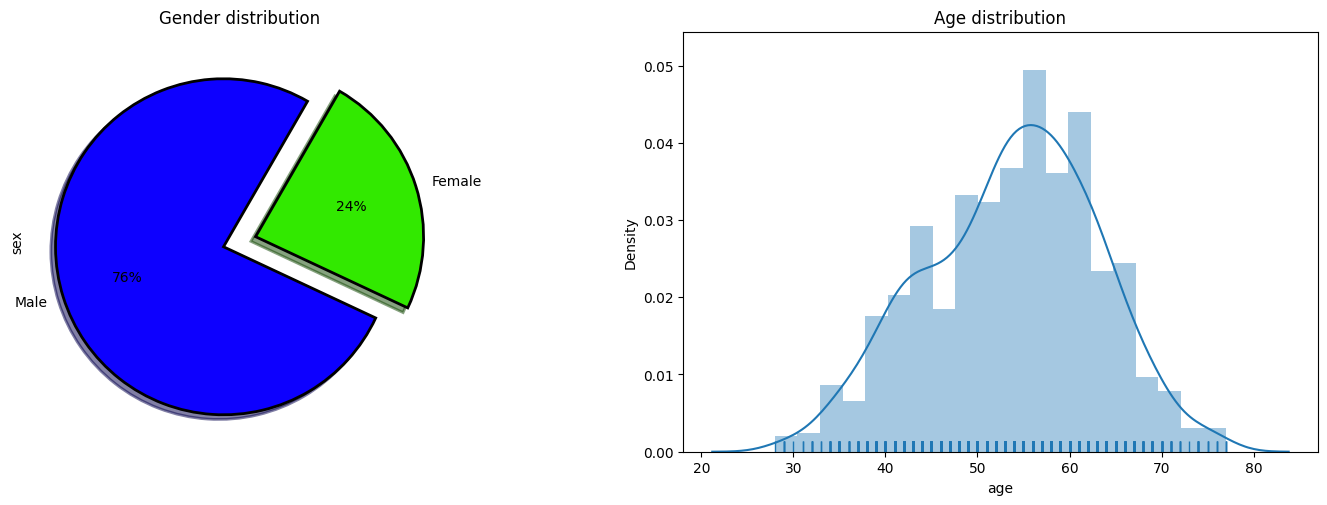

In [96]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Gender distribution")
plt.subplot(222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Age distribution")
plt.show()

Text(0.5, 1.0, 'Chest pain type distribution')

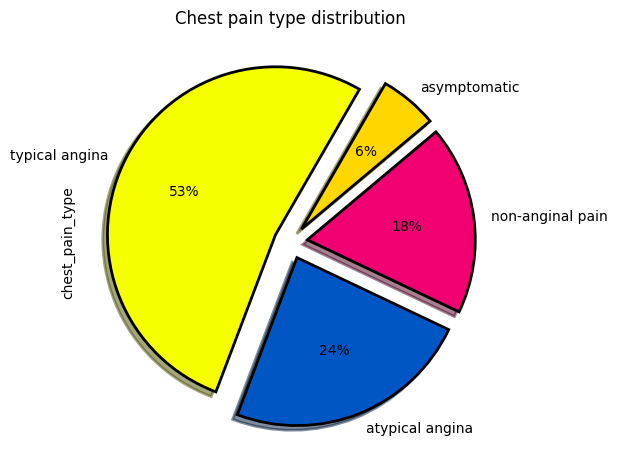

In [97]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["chest_pain_type"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["typical angina","atypical angina", "non-anginal pain", "asymptomatic"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1,.1,.1],shadow =True)
plt.title("Chest pain type distribution")




In [98]:
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


In [99]:
plot_criteria= ['resting_blood_pressure', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
resting_blood_pressure,,
0,0.000000,0.160000
80,0.180000,0.000000
92,0.000000,0.160000
94,0.710000,0.000000
95,0.000000,0.960000
96,0.000000,0.160000
98,0.180000,0.000000
100,1.780000,1.430000
101,0.360000,0.000000


In [100]:
df['rest_ecg'].value_counts()

normal                          683
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

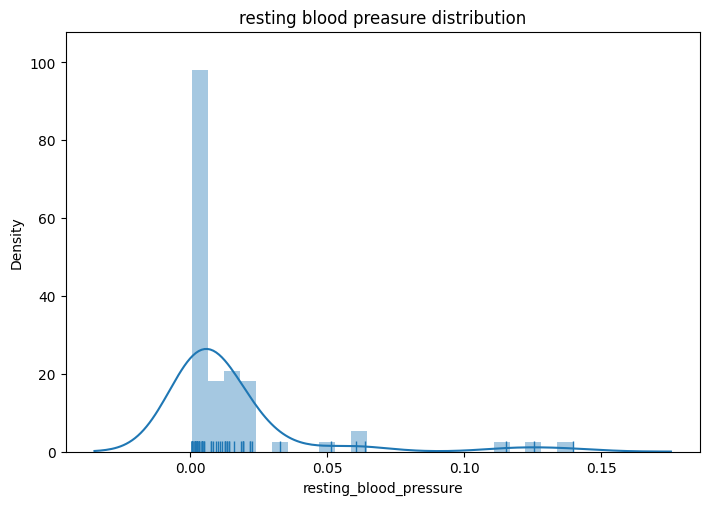

In [101]:
plt.figure(figsize=(18,12))
plt.subplot(221)
ax= sns.distplot(df['resting_blood_pressure'].value_counts('target==1'), rug=True)
plt.title("resting blood preasure distribution")
plt.show()

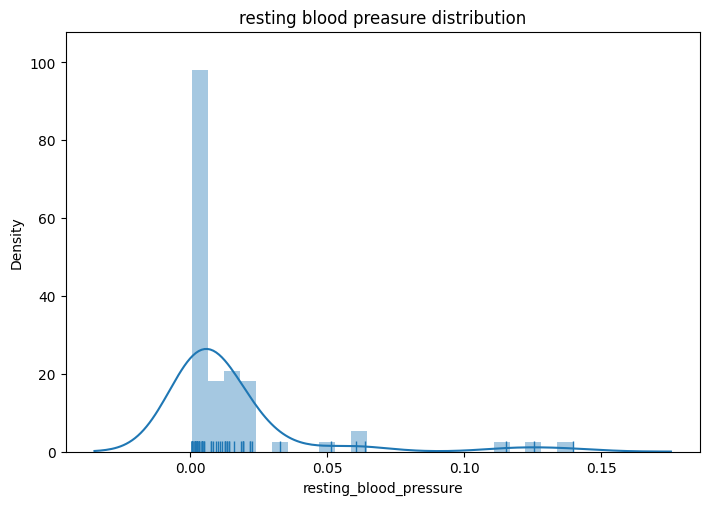

In [102]:
plt.figure(figsize=(18,12))
plt.subplot(221)
ax= sns.distplot(df['resting_blood_pressure'].value_counts(['target==0']), rug=True)
plt.title("resting blood preasure distribution")
plt.show()

In [103]:
attr_1

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
8,37,male,asymptomatic,140,207,0,normal,130,1,1.5,flat,1
11,58,male,atypical angina,136,164,0,ST-T wave abnormality,99,1,2.0,flat,1
13,49,male,asymptomatic,140,234,0,normal,140,1,1.0,flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,57,female,asymptomatic,140,241,0,normal,123,1,0.2,flat,1
1185,45,male,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,male,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1


In [104]:
attr_0

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
5,39,male,non-anginal pain,120,339,0,normal,170,0,0.0,upsloping,0
6,45,female,atypical angina,130,237,0,normal,170,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1175,56,male,atypical angina,130,221,0,left ventricular hypertrophy,163,0,0.0,upsloping,0
1176,56,male,atypical angina,120,240,0,normal,169,0,0.0,downsloping,0
1178,55,female,atypical angina,132,342,0,normal,166,0,1.2,upsloping,0
1182,41,male,atypical angina,120,157,0,normal,182,0,0.0,upsloping,0


In [105]:
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


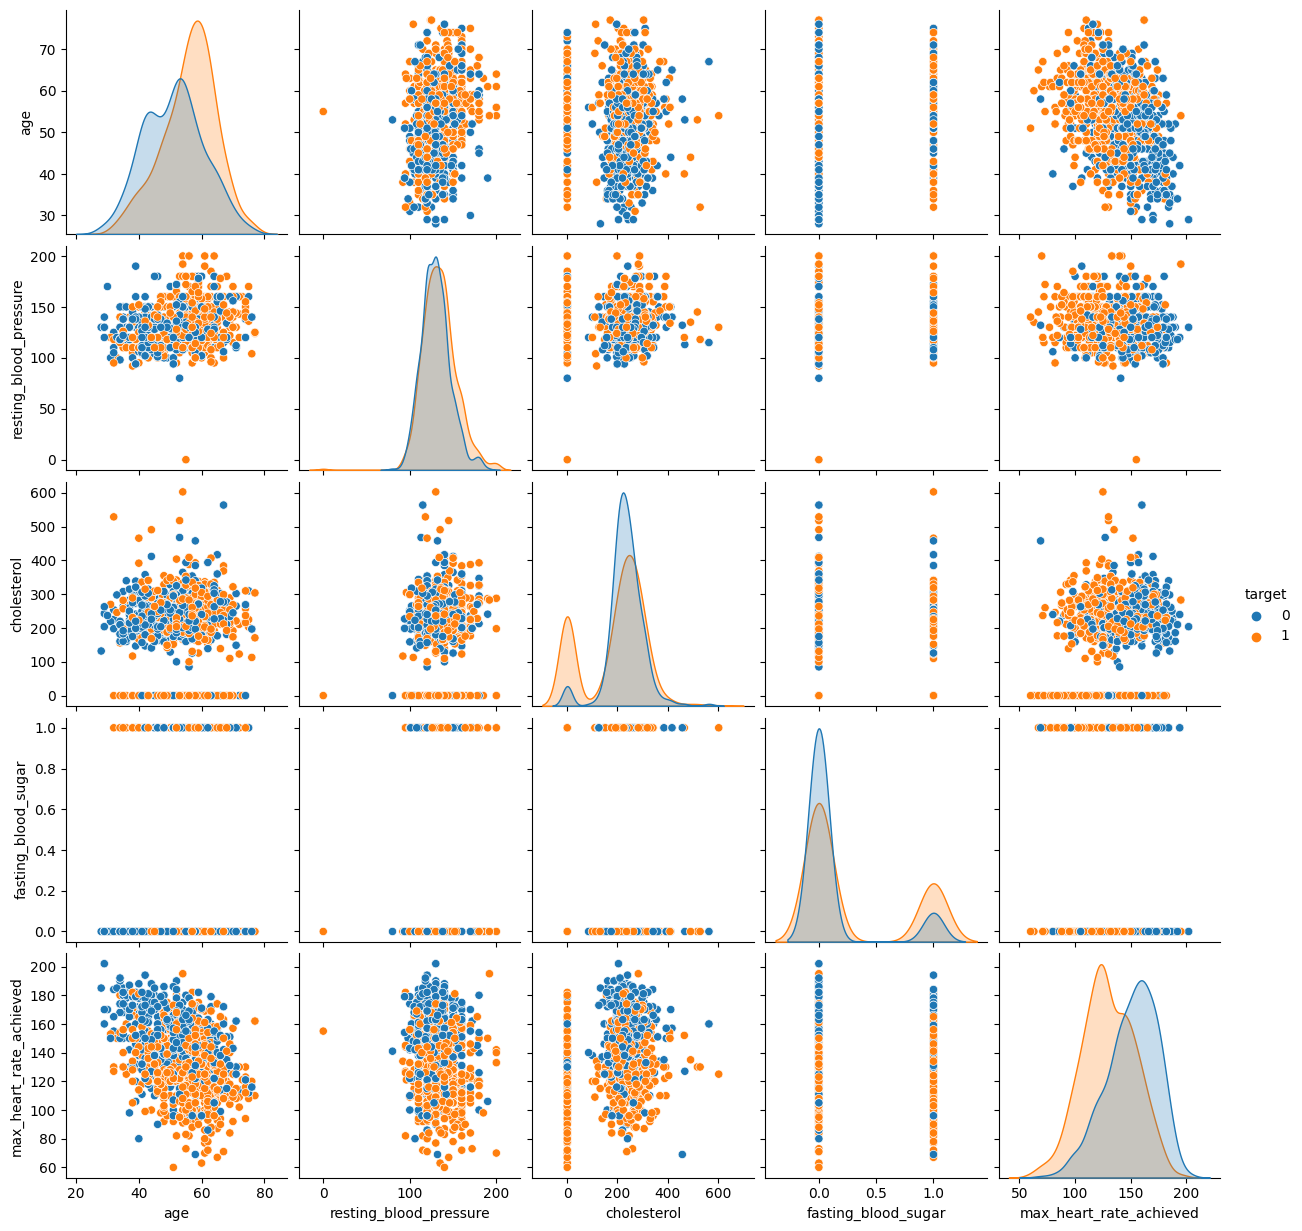

In [106]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'max_heart_rate_achieved'] )

In [107]:
df.corr()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
age,1.000000,0.256798,-0.046324,0.176906,-0.368662,0.189352,0.246501,0.261170
resting_blood_pressure,0.256798,1.000000,0.099202,0.086835,-0.101153,0.143180,0.176929,0.120736
cholesterol,-0.046324,0.099202,1.000000,-0.239908,0.238001,-0.033371,0.057361,-0.198322
fasting_blood_sugar,0.176906,0.086835,-0.239908,1.000000,-0.118388,0.054435,0.032626,0.215585
max_heart_rate_achieved,-0.368662,-0.101153,0.238001,-0.118388,1.000000,-0.378009,-0.183968,-0.413208
exercise_induced_angina,0.189352,0.143180,-0.033371,0.054435,-0.378009,1.000000,0.370415,0.482407
st_depression,0.246501,0.176929,0.057361,0.032626,-0.183968,0.370415,1.000000,0.399331
target,0.261170,0.120736,-0.198322,0.215585,-0.413208,0.482407,0.399331,1.000000


In [108]:
df


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,male,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,female,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [109]:
df2 = pd.read_csv("heart_disease_prediction.csv")

In [110]:
df2['target'].corr(df2['resting ecg'])

0.0730594804489627

In [111]:
df2['target'].corr(df2['chest pain type'])

0.4601269819025263

In [112]:
df2['target'].corr(df2['oldpeak'])

0.39838522471355486

In [113]:
df2['target'].corr(df2['ST slope'])

0.5056079709572007

In [114]:
df2

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


<Axes: ylabel='age'>

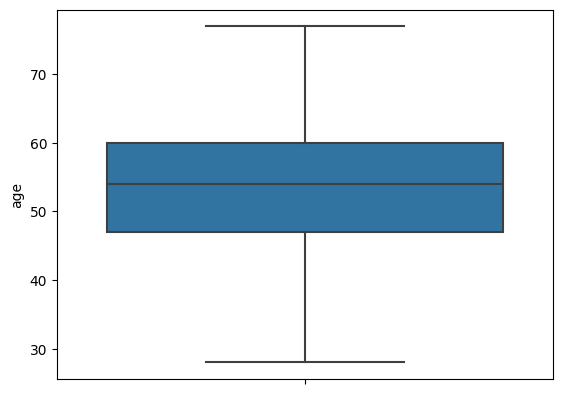

In [115]:
sns.boxplot(y='age', data = df)

<Axes: ylabel='chest pain type'>

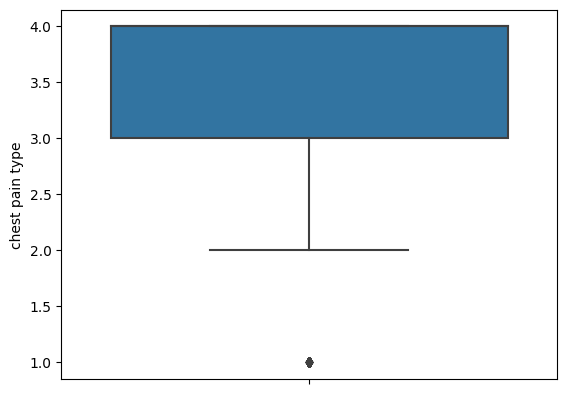

In [116]:
sns.boxplot(y='chest pain type', data = df2)

<Axes: ylabel='resting_blood_pressure'>

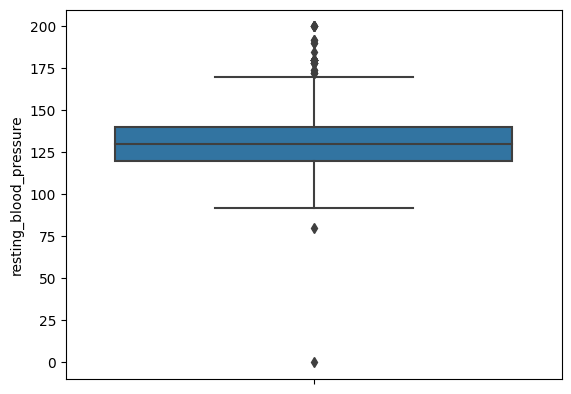

In [117]:
sns.boxplot(y='resting_blood_pressure', data = df)

<Axes: ylabel='cholesterol'>

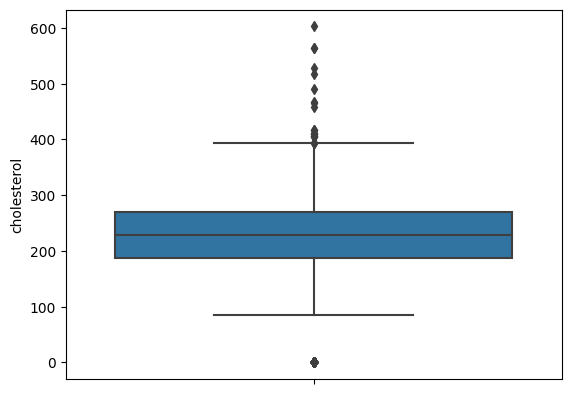

In [118]:
sns.boxplot(y='cholesterol', data = df)

<Axes: ylabel='exercise_induced_angina'>

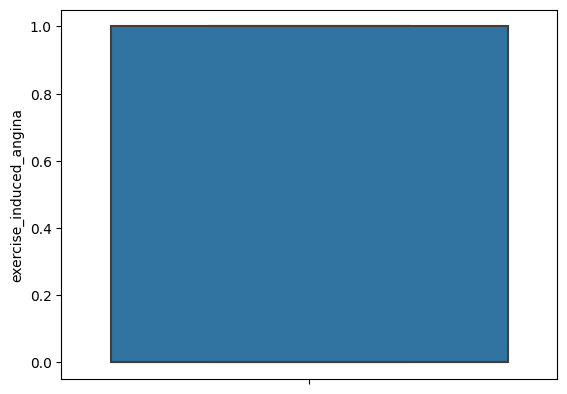

In [119]:
sns.boxplot(y='exercise_induced_angina', data = df)

In [120]:
df_outlier = df[['resting_blood_pressure','cholesterol']]
df_outlier.head(10)

,resting_blood_pressure,cholesterol
0,140,289
1,160,180
2,130,283
3,138,214
4,150,195
5,120,339
6,130,237
7,110,208
8,140,207
9,120,284


import numpy as np
from google.colab import autoviz
df_6808480320983330898 = autoviz.get_df('df_6808480320983330898')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6808480320983330898, *['resting_blood_pressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6808480320983330898 = autoviz.get_df('df_6808480320983330898')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6808480320983330898, *['cholesterol'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6808480320983330898 = autoviz.get_df('df_6808480320983330898')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6808480320983330898, *['resting_blood_pressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6808480320983330898 = autoviz.get_df('df_6808480320983330898')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6808480320983330898, *['cholesterol'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6808480320983330898 = autoviz.get_df('df_6808480320983330898')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6808480320983330898, *[[['resting_blood_pressure', 'cholesterol']]], **{})
chart

In [121]:
z = np.abs(stats.zscore(df_outlier))
z

,resting_blood_pressure,cholesterol
0,0.428136,0.775228
1,1.517370,0.299516
2,0.116481,0.716067
3,0.319212,0.035725
4,0.972753,0.151616
...,...,...
1185,1.205715,0.528727
1186,0.645983,0.171336
1187,0.116481,0.782658
1188,0.116481,0.252646


In [122]:
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  400,  450,  592,  617,  733,
        760, 1012, 1038, 1074]), array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]))


In [123]:
df = df[(z < 3).all(axis=1)]

In [125]:
df.shape

(1174, 12)

In [129]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [130]:
df.corr()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
age,1.000000,0.274051,-0.047160,0.176269,-0.377281,0.189039,0.244698,0.264665,0.022431,-0.203739,-0.022980,0.037752,0.140116,-0.210189,0.176339,-0.235660
resting_blood_pressure,0.274051,1.000000,0.104923,0.073251,-0.104340,0.137886,0.181737,0.114053,0.001184,-0.071012,-0.030631,0.086796,0.042970,-0.111094,0.102039,-0.103828
cholesterol,-0.047160,0.104923,1.000000,-0.252116,0.241051,-0.031577,0.056829,-0.205548,-0.210868,0.124739,-0.001233,0.018071,0.210375,-0.070730,-0.051912,0.095570
fasting_blood_sugar,0.176269,0.073251,-0.252116,1.000000,-0.112861,0.046619,0.022917,0.212581,0.114673,-0.113684,-0.012358,0.036762,-0.024302,-0.070937,0.074966,-0.123774
max_heart_rate_achieved,-0.377281,-0.104340,0.241051,-0.112861,1.000000,-0.382070,-0.188062,-0.419869,-0.183230,0.232374,0.154645,0.104586,0.124828,0.021422,-0.359162,0.397429
exercise_induced_angina,0.189039,0.137886,-0.031577,0.046619,-0.382070,1.000000,0.365900,0.484049,0.201890,-0.279243,-0.182644,-0.118250,-0.008833,-0.074266,0.363502,-0.421052
st_depression,0.244698,0.181737,0.056829,0.022917,-0.188062,0.365900,1.000000,0.402791,0.110560,-0.262344,-0.099705,0.056107,0.100296,-0.119820,0.303888,-0.469837
target,0.264665,0.114053,-0.205548,0.212581,-0.419869,0.484049,0.402791,1.000000,0.313001,-0.366300,-0.238391,-0.071312,0.027422,-0.105947,0.516436,-0.571113
sex_male,0.022431,0.001184,-0.210868,0.114673,-0.183230,0.201890,0.110560,0.313001,1.000000,-0.140340,-0.084583,0.013222,-0.041764,-0.012505,0.103310,-0.137594
chest_pain_type_atypical angina,-0.203739,-0.071012,0.124739,-0.113684,0.232374,-0.279243,-0.262344,-0.366300,-0.140340,1.000000,-0.261620,-0.114903,-0.102928,0.117856,-0.273976,0.320686


## **linear regression model**

In [134]:
df_final = df[['st_slope_flat','exercise_induced_angina','st_depression','age']]
df_final.head()



,st_slope_flat,exercise_induced_angina,st_depression,age
0,0,0,0.0,40
1,1,0,1.0,49
2,0,0,0.0,37
3,1,1,1.5,48
4,0,0,0.0,54


In [135]:
df_predict_value = df[['target']]
df_predict_value.head()

,target
0,0
1,1
2,0
3,1
4,0


In [136]:
model = LinearRegression()
model.fit(df_final, df_predict_value)

LinearRegression()

In [137]:
model.predict([[1,0,1,37]])

array([[0.49999652]])

In [139]:
model.predict([[1,1,1.5,48]])

array([[0.88633356]])

In [140]:
model.intercept_

array([-0.14088971])

In [141]:
model.coef_

array([[0.34484506, 0.28240742, 0.07852572, 0.0058788 ]])